### Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
% matplotlib inline

## Background 
Superheroes have always been a part of popular culture. They have been symbolic of their times, influenced by important historic events. Moreover, questions have always been raised about representation in the comic book world especially with respect to diversity. The following analysis seeks to explore some of these oft asked questions and present the evolution of superheroes over time.

## Table of Contents

1. [Reading and Cleaning Data](#Read-and-Clean-the-Data)<br>
    1.1 [Read Data](#Read-Data)<br>
    1.2 [Format Data](#Data-Cleaning-and-Formatting)<br>
2. [Birth Of Superheroes : A Timeline](#Analysis-1-:-Construct-a-Timeline-for-a-Subset-of-Superheroes-to-Visualize-their-Origins-with-Respect-to-Important-Historical-Events.)<br>
    2.1 [Graph for the Timeline](#The-Birth-of-Superheroes-:-A-Timeline)<br>
3. [Representation of Superhero Characters](#Analysis-2-:-Analyze-Representation-of-Gender-by-Alignment-in-the-Comic-Book-World.)<br>
    3.1 [Character Alignment by Gender](#Character-Alignment-by-Gender-in-Marvel)<br>
    3.2 [Increasing Diversity among Bad Characters](#Increasing-Diversity-among-Bad-Characters-in-Marvel)<br>
4. [Sexual Orientation of Superheroes Over Time](#Analysis-3-:-Analyze-Representation-of-Sexuality-in-the-Comic-Book-World.)<br>
    4.1 [Graph for Representation of Minor Sexual Orientations](#Representation-of-Sexual-Minorities)<br> 
5. [Marvel vs DC Top Grossing Movies](#Analysis-4:-Comparing-Marvel-vs-DC-Top-Grossing-Movies)<br>
    5.1 [Comparison Chart for Top Grossing Movies](#Marvel-vs-DC-Movies)<br> 

## Read and Clean the Data
### Datasets being read -  
- Marvel_wikia.csv : A dataset containing information about superheroes from Marvel comics
- DC_wikia.csv : A dataset containing information about superheroes from DC comics
- super_hero_powers.csv : A dataset containing information about powers of superheroes 

### Read Data

In [2]:
df_powers = pd.read_csv('super_hero_powers.csv')
df_marvel = pd.read_csv('Marvel_wikia.csv', index_col='Unnamed: 0')
df_dc = pd.read_csv('DC_wikia.csv', index_col='Unnamed: 0')

### Data Cleaning and Formatting

Convert column names of each dataframe to lower case.

In [3]:
df_powers.columns = map(str.lower, df_powers.columns)
df_marvel.columns = map(str.lower, df_marvel.columns)
df_dc.columns = map(str.lower, df_dc.columns)

Convert superhero names to lowercase


In [4]:
df_powers['hero_names'] = df_powers['hero_names'].str.lower().str.strip()

Calculate total number of powers each superhero has

In [5]:
df_powers['sum_powers'] = df_powers.sum(axis=1)

Add publisher information for each comic

In [6]:
df_marvel['publisher'] = 'marvel'

In [7]:
df_dc['publisher'] = 'dc'

Concatenate both marvel and dc comics superhero information

In [8]:
df_marvel_dc = df_marvel.append(df_dc)

In [9]:
df_marvel_dc.drop(columns=['page_id', 'urlslug', 'id', 'eye', 'hair', 'alive', 'first appearance'], inplace=True)

Superhero names have extra characters within round brackets. Simplify superhero name field.

In [10]:
df_marvel_dc['name'] = df_marvel_dc['name'].str.replace(r"\(.*\)","").str.lower().str.replace(r"W+","").str.strip()

## Analysis

### Analysis 1 : Construct a Timeline for a Subset of Superheroes to Visualize their Origins with Respect to Important Historical Events.

Retrieve rows for specific superheroes 

In [11]:
df_superhero_origins = df_marvel_dc[(df_marvel_dc['name'] == 'superman') | (df_marvel_dc['name'] == 'captain america')
                                    | (df_marvel_dc['name'] == 'flash') | (df_marvel_dc['name'] == 'hulk') 
                                    | (df_marvel_dc['name'] == 'luke cage') | (df_marvel_dc['name'] == 'frank castle') 
                                    | (df_marvel_dc['name'] == 'iron man')] \
                                    .sort_values('name').reset_index().drop(columns=['index'])

There appear to be multiple instances of the same hero - in this case, because there are multiple universes in which a hero can first appear. Move forward by selecting only the first year a character was introduced.

In [12]:
df_heroes = df_superhero_origins.iloc[[0, 4, 6, 7, 13, 14, 16]]
df_heroes.loc[df_heroes['name'] == 'superman', 'year'] = 1938 # Correct superman's year of origin

Create a dataframe for historical events. Leave the last event column blank for visualization purposes.

In [13]:
events = {'year': [1929, 1939, 1947, 1968, 1969, 1980],
'event':['Great depression', 'World war II', 'Cold war', 'Civil rights era', 'Vietnam War', ''],
'text':['The great Depression starts', 'World war II begins', 'Cold war begins', 'Civil rights act signed',
        'US troop withdrawal from Vietnam begins', '']}
df_history = pd.DataFrame(events)

#### The Birth of Superheroes : A Timeline

In [14]:
init_notebook_mode(connected=True)
trace1 = go.Scatter(x=df_history.year, y=[3, 3, 3, 3, 3, 3], text=df_history.text, hoverinfo='none', line=dict(width=4), 
                    mode='lines', opacity=1, showlegend=False)
trace2 = go.Scatter(x=df_heroes.year.sort_values(), y=[3, 3, 3, 3, 3, 3, 3],
                   text=['Superman : 1938', 'Captain America : 1941', 'The flash : 1956', 'The hulk: 1962',
                         'Iron man : 1963', 'Luke Cage : 1972', 'The punisher : 1974' ],
                    hoverinfo='text', opacity=0, showlegend=False)
layout = go.Layout(
    title='The Birth of Superheroes : A Timeline', titlefont=dict(family='Arial', size=25),
    width=1100,
    height=700,
    xaxis=dict(showticklabels=True, tickfont=dict(size=20, color='black'), mirror='ticks', linecolor='#636363',
               linewidth=1),
    yaxis=dict(showticklabels=False, zeroline=True, mirror='ticks', linecolor='#636363', linewidth=1),
    annotations=[
        dict(x=1929, y=3, xref='x', yref='y', text='1929<br>The great depression', ax=1, ay=60,
                      font=dict(size=12, color='#34495e'), align='center', arrowwidth=2, bordercolor='#c01565',
                      borderwidth=2, borderpad=4, bgcolor='#fbfcfc', opacity=0.8),
        dict(x=1939, y=3, xref='x', yref='y', text='1939<br>World War II', ax=1, ay=60,
                      font=dict(size=12, color='#34495e'), align='center', arrowwidth=2, bordercolor='#c01565',
                      borderwidth=2, borderpad=4, bgcolor='#fbfcfc', opacity=0.8),
        dict(x=1947, y=3, xref='x', yref='y', text='1947<br>Cold war begins', ax=1, ay=60,
                      font=dict(size=12, color='#34495e'), align='center', arrowwidth=2, bordercolor='#c01565',
                      borderwidth=2, borderpad=4, bgcolor='#fbfcfc', opacity=0.8),
        dict(x=1968, y=3, xref='x', yref='y', text='1968<br>Civil rights act signed', ax=1, ay=60,
                      font=dict(size=12, color='#34495e'), align='center', arrowwidth=2, bordercolor='#c01565',
                      borderwidth=2, borderpad=4, bgcolor='#fbfcfc', opacity=0.8),
        dict(x=1973, y=3, xref='x', yref='y', text='1973<br>US troop withdrawal from<br>Vietnam begins',
                      font=dict(size=12, color='#34495e'), align='center', arrowwidth=2, ax=1, ay=110,
                      bordercolor='#c01565', borderwidth=2, borderpad=4, bgcolor='#fbfcfc', opacity=0.8)],
    
    images=[
        dict(source="superman.png", xref="x", yref="y", x=1938, y=3.01, sizex=2, sizey=0.35,
             sizing="stretch", xanchor="right", yanchor="bottom"),
        dict(source="captain america.png",xref="x", yref="y", x=1941, y=3.05, sizex=2.5, sizey=0.27,
             sizing="stretch", xanchor="left", yanchor="bottom"),
        dict(source="flash.png", xref="x", yref="y", x=1956, y=3, sizex=2.5, sizey=0.37, sizing="stretch",
             xanchor="right", yanchor="bottom"),
        dict(source="the hulk.png", xref="x", yref="y", x=1962, y=3.05, sizex=2.5, sizey=0.3, sizing="stretch",
             xanchor="right", yanchor="bottom"),
        dict(source="ironman.png", xref="x", yref="y", x=1963, y=3.05, sizex=2.5, sizey=0.3, sizing="stretch",
             xanchor="left", yanchor="bottom"),
        dict(source="luke cage.png", xref="x", yref="y", x=1972, y=3.05, sizex=2.5, sizey=0.3, sizing="stretch",
             xanchor="right", yanchor="bottom"),
        dict(source="punisher.png", xref="x", yref="y", x=1974, y=3.05, sizex=2.5, sizey=0.3, sizing="stretch",
             xanchor="left", yanchor="bottom")])       
fig = go.Figure(data=[trace1, trace2], layout=layout)
plotly.offline.iplot(fig, filename='hero_origins_temp.html')

<b> The plot shows how historical events preceed the origins of certain superheroes. These events helped shape the personas of these heroes. </b> 
- The Great Depression led to the emergence of superheroes and specifically the two most culturally important ones, Superman and Batman. Superman, an alien who grew up in an area most affected by the Great Depression, would fight for the cause of powerless people. As a parallel, Batman is one of the wealthy who played some part in causing the Great Depression. However, he chooses to fight against the corruption he would otherwise benefit from. 
- Captain America is a product of WW2, a military symbol of all cultural calls of the time - that America act against Nazism, fascism, and communism, with the utmost leadership, strength, and honor.
- The Cold War and the ensuing arms race led to the imagination behind superheroes like the Flash, the Hulk and Iron Man. These heroes were either a by-product of experiments gone wrong(in case of the Flash and Hulk) or that of superior technology(Iron Man). 
- The Civil Rights movement saw the birth of Luke Cage. Also influenced by blaxploitation movies, Luke rebelled against the  establishment and was considered more or less to be an antihero— especially significant following the turmoil of the 1960s and movement itself.
- Towards the end of the Vietnam war, troubled superheroes started taking shape. An example was Frank Castle. Tormented by PTSD, which he chooses to hide until his family is murdered, Frank soon turns into the Punisher. He goes on to seek retribution and cleanse the country with the very thing it had endlessly romanticized - bullets, war and death. 

### Analysis 2 : Analyze Representation of Gender by Alignment in the Comic Book World.

Generate Decade and Era information for each superhero

In [15]:
## create bins for decade
df_marvel_dc.loc[(df_marvel_dc['year'] >= 1930) & ((df_marvel_dc['year'] < 1940)), 'decade'] = '1930'
df_marvel_dc.loc[(df_marvel_dc['year'] >= 1940) & ((df_marvel_dc['year'] < 1950)), 'decade'] = '1940'
df_marvel_dc.loc[(df_marvel_dc['year'] >= 1950) & ((df_marvel_dc['year'] < 1960)), 'decade'] = '1950'
df_marvel_dc.loc[(df_marvel_dc['year'] >= 1960) & ((df_marvel_dc['year'] < 1970)), 'decade'] = '1960'
df_marvel_dc.loc[(df_marvel_dc['year'] >= 1970) & ((df_marvel_dc['year'] < 1980)), 'decade'] = '1970'
df_marvel_dc.loc[(df_marvel_dc['year'] >= 1980) & ((df_marvel_dc['year'] < 1990)), 'decade'] = '1980'
df_marvel_dc.loc[(df_marvel_dc['year'] >= 1990) & ((df_marvel_dc['year'] < 2000)), 'decade'] = '1990'
df_marvel_dc.loc[(df_marvel_dc['year'] >= 2000) & ((df_marvel_dc['year'] < 2010)), 'decade'] = '2000'
df_marvel_dc.loc[(df_marvel_dc['year'] >= 2010) & ((df_marvel_dc['year'] <= 2018)), 'decade'] = '2010'
## create bins for era
df_marvel_dc.loc[(df_marvel_dc['year'] >= 1930) & ((df_marvel_dc['year'] < 1960)), 'era'] = 'pre 1960s'
df_marvel_dc.loc[(df_marvel_dc['year'] >= 1960) & ((df_marvel_dc['year'] < 2000)), 'era'] = 'post 60s to 2000'
df_marvel_dc.loc[(df_marvel_dc['year'] >= 2000) & ((df_marvel_dc['year'] <= 2018)), 'era'] = 'post Y2K'

How characters align under both DC and Marvel.

In [16]:
df_marvel_dc.groupby(['publisher', 'align'])[['name']].count()

name
publisher align                   
dc        Bad Characters      2895
          Good Characters     2832
          Neutral Characters   565
          Reformed Criminals     3
marvel    Bad Characters      6720
          Good Characters     4636
          Neutral Characters  2208

Under Marvel Comics, there is a vast difference between various character alignments. Expanding the analysis to explore how this  alignment varies across different genders under Marvel.

Categorize genders into two, 'Male Characters' and 'Other Genders'.

In [17]:
df_marvel_dc.loc[df_marvel_dc['sex'] != 'Male Characters', 'sex'] = 'Other Genders'

In [18]:
df_only_marvel = df_marvel_dc[df_marvel_dc['publisher'] == 'marvel']

In [19]:
def simplify_alignments(alignment):
    """
    Replace alignments with simplified titles 
    """
    if alignment == 'Good Characters':
        return 'Good'
    elif alignment == 'Neutral Characters':
        return 'Neutral'
    else:
        return 'Bad'

In [20]:
df_only_marvel['simple_align'] = df_only_marvel['align'].apply(lambda align: simplify_alignments(align))

#### Character Alignment by Gender in Marvel

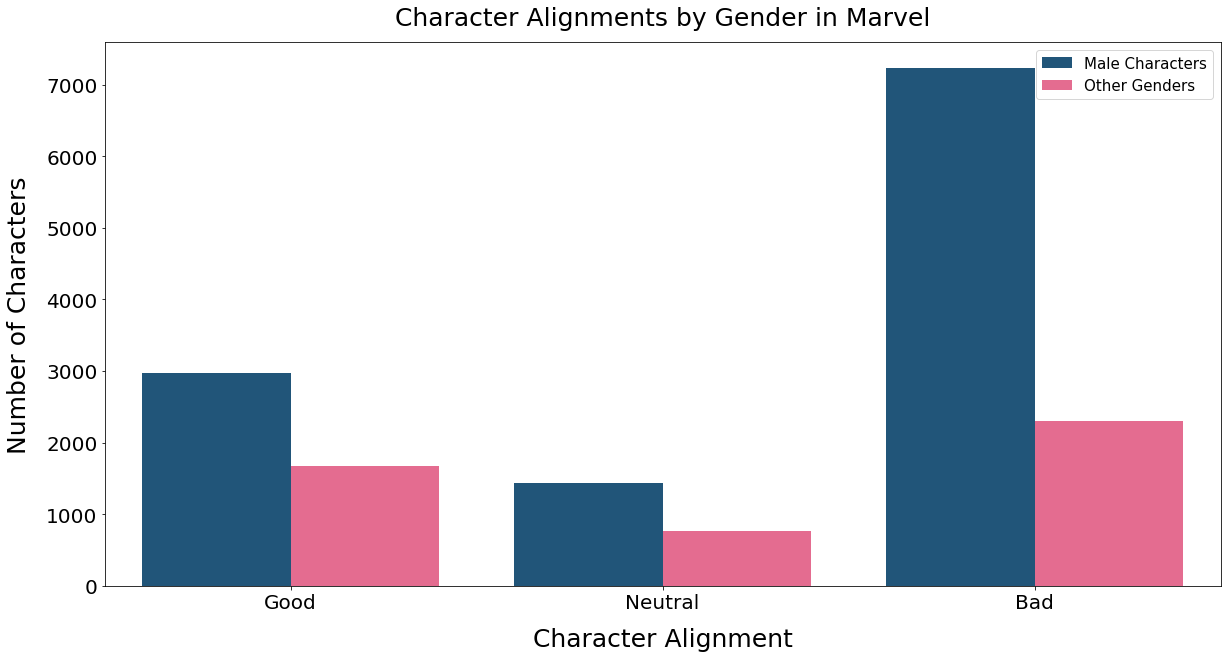

In [21]:
ytick = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
plt.figure(figsize=(20, 10))
sns.countplot(x='simple_align', hue='sex', data=df_only_marvel, palette=['#125888', '#F85888'])
plt.title("Character Alignments by Gender in Marvel", y=1.02, fontsize=25)
plt.xlabel("Character Alignment", labelpad=15, fontsize=25)
plt.ylabel("Number of Characters", labelpad=15, fontsize=25)
plt.legend(fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(ytick, fontsize=20)
plt.show()

#### Bad characters in Marvel comics are mostly male, while the other genders have a more balanced distribution across gender alignment. It would be interesting to further analyze if there is a trend across decades for bad characters.

In [22]:
df_only_marvel_bad = df_only_marvel.loc[(df_only_marvel['align'] == 'Bad Characters'), ['year', 'decade', 'sex']]
df_only_marvel_bad.dropna(inplace=True)

In [23]:
df_only_marvel_bad.loc[df_only_marvel_bad['sex'] == 'Male Characters', 'Male'] = 1
df_only_marvel_bad.loc[df_only_marvel_bad['sex'] == 'Male Characters', 'Other Genders'] = 0
df_only_marvel_bad.loc[df_only_marvel_bad['sex'] == 'Other Genders', 'Other Genders'] = 1
df_only_marvel_bad.loc[df_only_marvel_bad['sex'] == 'Other Genders', 'Male'] = 0

In [24]:
df_year_stackplot = df_only_marvel_bad.groupby('year')[['Male', 'Other Genders']].sum().reset_index()
df_year_stackplot['cumsum_male'] = df_year_stackplot['Male'].cumsum()
df_year_stackplot['cumsum_other'] = df_year_stackplot['Other Genders'].cumsum()
df_year_stackplot.drop(columns=['Male', 'Other Genders'], inplace=True)
df_year_stackplot.set_index('year', inplace=True)
df_year_stackplot = df_year_stackplot[['cumsum_other', 'cumsum_male']]

#### Increasing Diversity among Bad Characters in Marvel

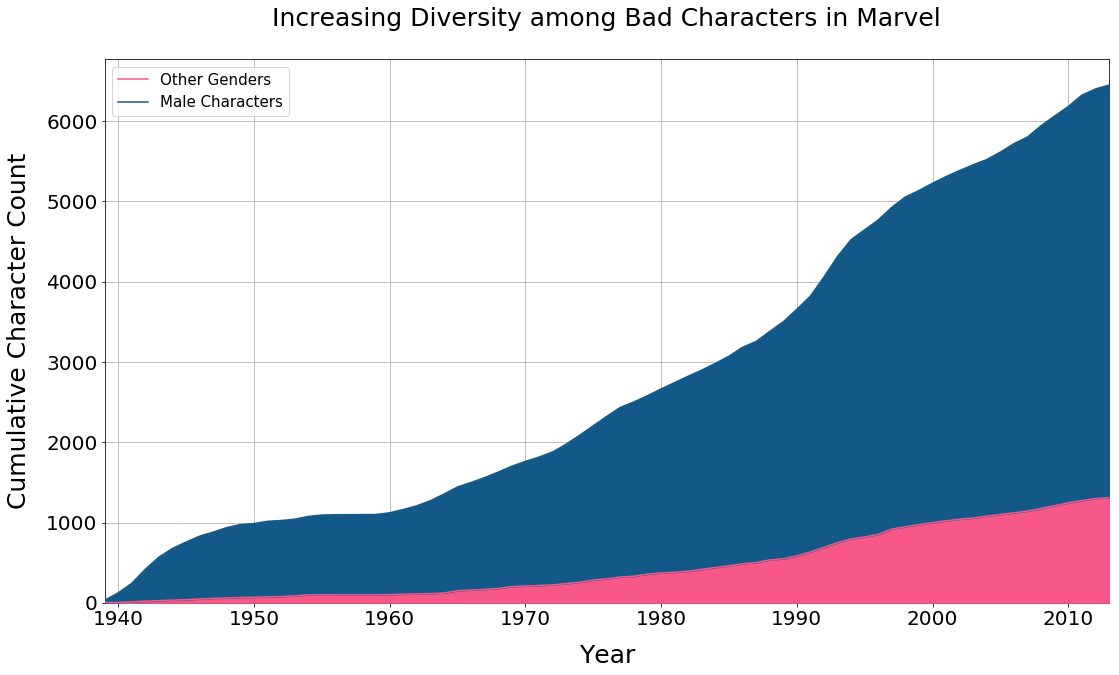

In [25]:
df_year_stackplot.plot.area(figsize=(18,10), color=['#F85888', '#125888'], grid=True, zorder=3)
plt.grid(zorder=0)
plt.title("Increasing Diversity among Bad Characters in Marvel", y=1.05, fontsize=25)
plt.xlabel("Year", labelpad=15, fontsize=25)
plt.ylabel("Cumulative Character Count", labelpad=15, fontsize=25)
plt.legend(labels=['Other Genders', 'Male Characters'], fontsize=15, loc='upper left')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.margins(x=0)
plt.show()

<b>There has been an upward trend in representation of other genders when it comes to negative characters, through the decades.</b><br>
The proportion starts improving from the 60s, right around the time when various women centric movements started gaining momentum. While there is an upward trend in diversity, it is still not split around 50-50 like a truly diverse comic book universe would entail. There is no objective reason that male characters ought to make up such a high proportion, so maybe this most accurately represents the stereotypes that men can be the most violent and/or power-hungry. 

### Analysis 3 : Analyze Representation of Sexuality in the Comic Book World.

In [26]:
df_sexual_orientation = df_marvel_dc[['decade', 'gsm']]

In [27]:
df_sexual_orientation.loc[df_sexual_orientation.gsm.isnull(), 'Straight'] = 1
df_sexual_orientation.loc[df_sexual_orientation.Straight != 1, 'Straight'] = 0
df_sexual_orientation.loc[df_sexual_orientation.Straight != 1, 'Other'] = 1
df_sexual_orientation.loc[df_sexual_orientation.Other != 1, 'Other'] = 0

In [28]:
df_orientation_decade_det = df_sexual_orientation.groupby(['decade', 'gsm']).size().reset_index().rename(columns={0:'counts'})
decade = []
decades = []
detail = []
details = ['0']
for decade in df_orientation_decade_det.decade:
    decades.append(decade)
decade = sorted(list(set(decades)))
for dec in decade:
    detail.append(df_orientation_decade_det[df_orientation_decade_det.decade == dec][['gsm', 'counts']].values)
for d in detail:
    temp = []
    for i in range(0, len(d)):
        temp.append(d[i][0] + ': ' + str(d[i][1]))
    details.append(temp)

detail_list = []
for det in details:
    detail_list.append('<br>'.join(det))
detail_list

df_orientation_decade = df_sexual_orientation[['decade', 'Other']].groupby('decade').mean().reset_index()
mean = df_orientation_decade[df_orientation_decade.decade != 1930]['Other'].values

#### Representation of Sexual Minorities

In [29]:
init_notebook_mode(connected=True)
trace1 = go.Scatter(x=df_orientation_decade.decade, y=df_orientation_decade.Other, line=dict(width=4), 
                    text=detail_list, hoverinfo='text', mode='lines', opacity=1, showlegend=False)
layout1 = go.Layout(
    title='Representation of Sexual Minorities over the Decades', titlefont=dict(family='Arial', size=25),
    xaxis=dict(title='Decades', titlefont=dict(size=25), showticklabels=True, tickfont=dict(size=20, color='black')),
    yaxis=dict(title='Percentage', titlefont=dict(size=25), showticklabels=True, 
                 tickvals=[0, 0.002, 0.004, 0.006, 0.008, 0.01, 0.012],
                 ticktext=['0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2'],
                 tickfont=dict(size=20, color='black')))
fig1 = go.Figure(data=[trace1], layout=layout1)
plotly.offline.iplot(fig1, filename='sexuality_scatterplot.html')

<b>Representation of sexual minorities marginally improves over time but is still abysmally low.</b><br>
Representation of sexual minorities has been very low in the comic book world. It marginally improved post the 2000s but is still around only 1%.

### Analysis 4 : Comparing Marvel v DC Top Grossing Movies

In [30]:
marvel_movies = {'Title': ['Avengers: Infinity War', 'The Avengers', 'Avengers: Age of Ultron', 'Black Panther', 'Iron Man 3'],
                'Worldwide Gross': [2041080000, 1518810000, 1405400000, 1346550000, 1214810000],
                'Company': ['DC', 'DC', 'DC', 'DC', 'DC']}
dc_movies = {'Title': ['The Dark Knight Rises', 'The Dark Knight', 'BvS: Dawn of Justice',
                       'Wonder Woman', 'Suicide Squad'], 
            'Worldwide Gross': [1084940000, 1004560000, 873630000, 821850000, 746850000],
            'Company': ['Marvel', 'Marvel', 'Marvel', 'Marvel', 'Marvel']}

In [31]:
df_marvel_movies = pd.DataFrame(data=marvel_movies).infer_objects()
df_dc_movies = pd.DataFrame(data=dc_movies).sort_values('Worldwide Gross', ascending=True).infer_objects()

In [32]:
def x_fmt(tick_val, pos):
    if tick_val == 1000000000:
        return '1 B'
    elif tick_val == 2000000000:
        return '2 B'
    elif tick_val == 1500000000:
        return '1.5 B'
    elif tick_val == 0:
        return '0'
    elif tick_val > 1000000000:
        val = int(tick_val) / 1000000000
        return '{:.2f} B'.format(val)
    else:
        val = int(int(tick_val) / 1000000)
        return '{:d} M'.format(val)

#### Marvel vs DC Movies

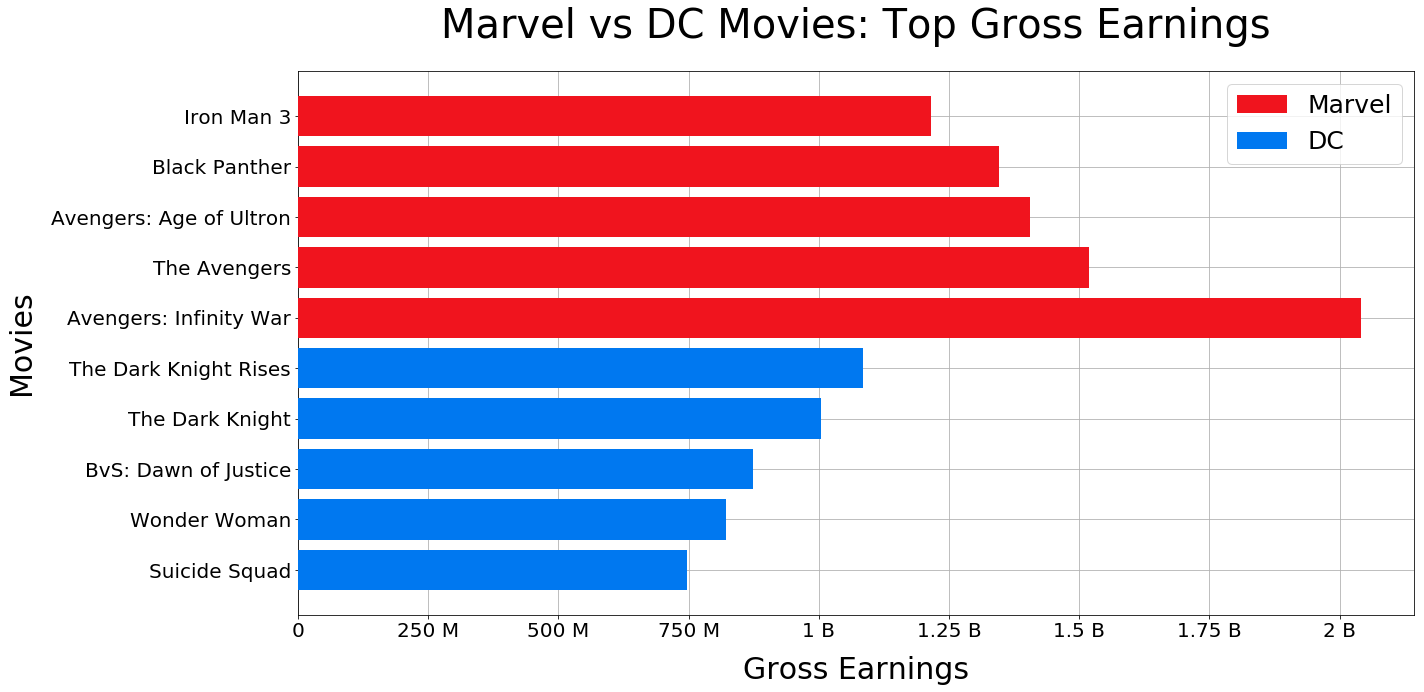

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Marvel vs DC Movies: Top Gross Earnings', size=40, y=1.05)
red_color = ['#0078F0']
blue_color = ['#F0141E']
plot1 = plt.barh('Title', 'Worldwide Gross', data=df_dc_movies, color=red_color, align='center', zorder=3, label='DC')
plot2 = plt.barh('Title', 'Worldwide Gross', data=df_marvel_movies, color=blue_color, align='center', zorder=3, label='Marvel')
ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
plt.legend(handles=[plot2, plot1], loc=0, fontsize=25)
ax.set_xlabel('Gross Earnings', size=30, labelpad=15)
ax.set_ylabel('Movies', size=30, labelpad=15)
plt.xticks(size=20)
plt.yticks(size=20)
plt.grid(zorder=0)
plt.show()

### Overall Marvel movies have vastly outperformed movies based on DC comics. In fact the 5th highest grossing Marvel movie has made more money than the highest grossing DC movie!